#Download helper function

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py


--2023-03-12 09:03:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-03-12 09:03:20 (67.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
from helper_functions import create_tensorboard_callback, unzip_data, plot_loss_curves, walk_through_dir

# Get The data

In [3]:
## Download and unzip
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")

--2023-03-12 09:03:25--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  23.5MB/s    in 7.9s    

2023-03-12 09:03:33 (20.4 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/trai

## Prepare The data

In [5]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [6]:
import tensorflow as tf
IMAGE_SIZE = (224,224)
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 image_size=IMAGE_SIZE,
                                                                 batch_size=BATCH_SIZE,
                                                                 label_mode="categorical")
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                 image_size=IMAGE_SIZE,
                                                                 batch_size=BATCH_SIZE,
                                                                 label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [7]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [8]:
train_data.element_spec


(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))

In [9]:
for images, labels in train_data.take(1):
  print(images,labels)

tf.Tensor(
[[[[1.62901783e+01 6.29017830e+00 5.29017830e+00]
   [1.42857141e+01 4.28571415e+00 3.28571439e+00]
   [1.50491076e+01 5.04910755e+00 4.04910755e+00]
   ...
   [2.42671852e+01 1.82671852e+01 2.07404518e+01]
   [2.20745888e+01 1.60745888e+01 2.00745888e+01]
   [1.95293312e+01 1.55293312e+01 1.65293312e+01]]

  [[1.40462370e+01 4.04623699e+00 3.04623699e+00]
   [1.40000000e+01 4.00000000e+00 3.00000000e+00]
   [1.55267859e+01 5.52678585e+00 4.52678585e+00]
   ...
   [2.95812588e+01 2.35812588e+01 2.55812588e+01]
   [2.60487442e+01 2.00487442e+01 2.20487442e+01]
   [2.31635666e+01 1.71635666e+01 1.91635666e+01]]

  [[1.58657522e+01 5.86575174e+00 4.65146589e+00]
   [1.53695784e+01 5.36957884e+00 4.15529299e+00]
   [1.63348217e+01 6.33482122e+00 5.12053537e+00]
   ...
   [3.25758133e+01 2.33615303e+01 2.59329567e+01]
   [2.79980335e+01 1.87837486e+01 1.98749123e+01]
   [2.58568039e+01 1.62142868e+01 1.70124245e+01]]

  ...

  [[1.71556625e+01 1.41556625e+01 9.15566254e+00]
   [1

#  Create Model

In [10]:
import tensorflow as tf
# 1. Base Model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2 Freeze the layers and dont train
base_model.trainable=False

# 3 GET THE INPUTS
inputs = tf.keras.layers.Input(shape=(224,224,3), name="InputLayer")

# 4. Rescale the inputs ..... This is not for all the models like efficinet net
# X = tf.keras.layers.experimental.preprosessing.Rescalling(1/225.) (inputs)

# 5 top layers after the base model layers
x = base_model(inputs)

# 6 pooling layer
x = tf.keras.layers.GlobalAveragePooling2D(name="GlobalAveragePoolingLayer")(x)

# 7 output
output = tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer")(x)

# 8 CREATE THE MODLE
model_0 = tf.keras.Model(inputs, output)

# 9 COMPILT
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# 10 fit
history_0= model_0.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data),
            callbacks=[create_tensorboard_callback("transfer_learning", "Feature_extraction")])


16705208/16705208 [==============================] - 2s 0us/step


Saving TensorBoard log files to: transfer_learning/Feature_extraction/20230312-090347
Epoch 1/5
24/24 [==============================] - 24s 428ms/step - loss: 1.8931 - accuracy: 0.4213 - val_loss: 1.3294 - val_accuracy: 0.6932
Epoch 2/5
24/24 [==============================] - 12s 509ms/step - loss: 1.1044 - accuracy: 0.7720 - val_loss: 0.8825 - val_accuracy: 0.8132
Epoch 3/5
24/24 [==============================] - 7s 289ms/step - loss: 0.7796 - accuracy: 0.8493 - val_loss: 0.7076 - val_accuracy: 0.8396
Epoch 4/5
24/24 [==============================] - 8s 294ms/step - loss: 0.6349 - accuracy: 0.8587 - val_loss: 0.6173 - val_accuracy: 0.8508
Epoch 5/5
24/24 [==============================] - 8s 320ms/step - loss: 0.5393 - accuracy: 0.8800 - val_loss: 0.5618 - val_accuracy: 0.8620


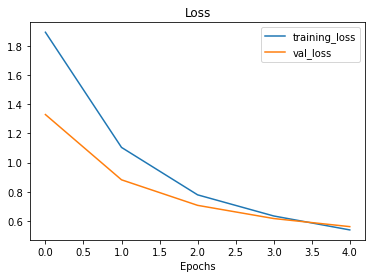

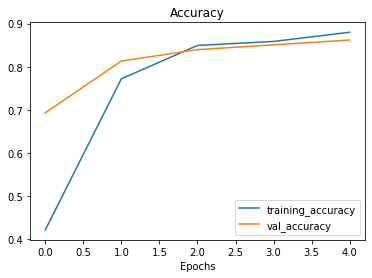

In [11]:
plot_loss_curves(history_0)

# MODEL_1 1 PERCENT DATA

In [12]:
# Get the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

--2023-03-12 09:05:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  21.8MB/s    in 6.5s    

2023-03-12 09:05:12 (19.6 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [13]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There a

In [14]:
train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"

In [15]:
import tensorflow as tf

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode="categorical",
                                                                           image_size=(224,224),
                                                                           batch_size=32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=(224,224),
                                                                batch_size=32)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [16]:
for imgage_1, lable in train_data_1_percent.take(1):
  print(imgage_1.shape)


(32, 224, 224, 3)


In [17]:
train_data_1_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [18]:

# augementing layer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomRotation(0.2),
    # preprocessing.Rescaling(1/255.) 
], name="data_augementation")

TensorShape([523, 412, 3])

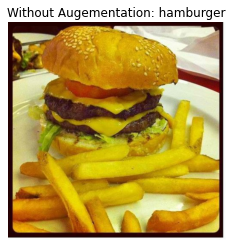

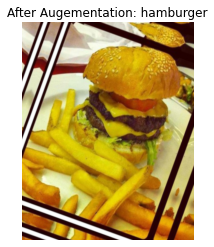

In [19]:
# lets see if the augementation is working
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

random_class = random.choice(train_data_1_percent.class_names)
target_dir = train_dir_1_percent + "/" + random_class
random_img = random.choice(os.listdir(target_dir))
img_path =target_dir + "/" + random_img
img = mpimg.imread(img_path)
plt.imshow(img)
plt.title(f"Without Augementation: {random_class}")
plt.axis(False)

# now augemted one
img.shape
augemented_img = data_augmentation(img)
plt.figure()
plt.imshow(augemented_img/255.)
plt.title(f"After Augementation: {random_class}")
plt.axis(False)
augemented_img.shape


In [20]:
# create the model

# baseline first
base_model_1 = keras.applications.EfficientNetB0(include_top=False)
base_model_1.trainable = False

# inputs
inputs = layers.Input(shape=(224,224,3), name="input_layer")

# data augementsat

x = data_augmentation(inputs)

# feed the input into the base model
x = base_model_1(x, training=False)

# pooling layer
x = layers.GlobalAveragePooling2D(name="GlobalPoolinglayer")(x)

# output
outputs = layers.Dense(10, activation='softmax', name="output_layer")(x)

model_1 = keras.Model(inputs, outputs)
model_1.compile(loss="categorical_crossentropy",
                optimizer=keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data_1_percent,
                        epochs=5,
                        steps_per_epoch=len(train_data_1_percent),
                        validation_data = test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                               experiment_name="model_1_percent")])

Saving TensorBoard log files to: transfer_learning/model_1_percent/20230312-090518
Epoch 1/5


3/3 [==============================] - ETA: 0s - loss: 2.3655 - accuracy: 0.1571

3/3 [==============================] - 14s 2s/step - loss: 2.3655 - accuracy: 0.1571 - val_loss: 2.3100 - val_accuracy: 0.1102
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 2.1070 - accuracy: 0.1714 - val_loss: 2.1800 - val_accuracy: 0.2056
Epoch 3/5
3/3 [==============================] - 4s 2s/step - loss: 1.9430 - accuracy: 0.4000 - val_loss: 2.0662 - val_accuracy: 0.2681
Epoch 4/5
3/3 [==============================] - 3s 1s/step - loss: 1.7417 - accuracy: 0.5857 - val_loss: 1.9643 - val_accuracy: 0.3520
Epoch 5/5
3/3 [==============================] - 4s 2s/step - loss: 1.6086 - accuracy: 0.6714 - val_loss: 1.8695 - val_accuracy: 0.4161


In [21]:
# evaluate
model_1.evaluate(test_data)

79/79 [==============================] - 7s 90ms/step - loss: 1.8735 - accuracy: 0.4048


[1.873466968536377, 0.4047999978065491]

In [22]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augementation (Sequent  (None, None, 3)          0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 GlobalPoolinglayer (GlobalA  (None, 1280)             0         
 veragePooling2D)                                                
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

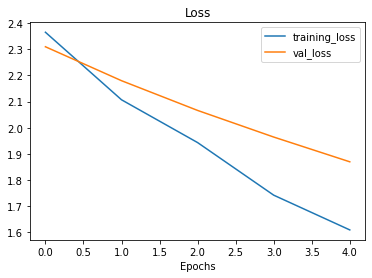

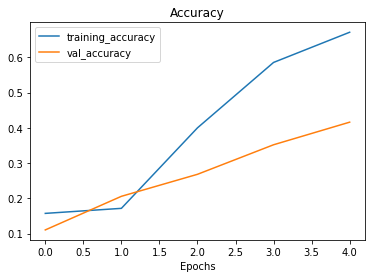

In [23]:
plot_loss_curves(history_1)

# MODEL 2 10% DATA WITH DATA AUGMENTATION

In [24]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")

--2023-03-12 09:06:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M  19.3MB/s    in 9.6s    

2023-03-12 09:06:15 (16.8 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [25]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/trai

In [26]:
train_dir_10_percent = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras  import layers

train_data_10 = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_10_percent,
                                                                    image_size=(224,224),
                                                                    label_mode="categorical")
test_dir = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                               image_size=(224,224),
                                                               label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [28]:
train_data_10.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [29]:
# from tensorflow.keras.layers.experimental import preprocessing

data_augementaion = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomZoom(0.2),
    layers.RandomRotation(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
], name="data_augentation_layer")


input_shape = (224, 224, 3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

input = layers.Input(shape=input_shape, name="input_layer")

x = data_augementaion(input)

x = base_model(x, training=False)

x = layers.GlobalAveragePooling2D(name="Pooling_layer")(x)

output = layers.Dense(10, activation="softmax", name="output_layer")(x)

model_2 = keras.Model(input, output)

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [55]:
# create callback
checkpoint_path = "ten_percent_model_checkpoint/checkpoint.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_feq="epoch",
                                                         verbose=1)

In [31]:
initial_epochs=5

history_2 = model_2.fit(train_data_10,
            epochs=initial_epochs,
            steps_per_epoch=len(train_data_10),
            validation_data=test_data,
            validation_steps=int(0.25 * len(test_data)),
            callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                   experiment_name="10_percent_data_model_2"),
                       checkpoint_callback]
            )

Saving TensorBoard log files to: transfer_learning/10_percent_data_model_2/20230312-090621
Epoch 1/5


24/24 [==============================] - ETA: 0s - loss: 1.9344 - accuracy: 0.3600
Epoch 1: saving model to ten_percent_model_checkpoint/checkpoint.ckpt
24/24 [==============================] - 29s 829ms/step - loss: 1.9344 - accuracy: 0.3600 - val_loss: 1.4208 - val_accuracy: 0.6711
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.2653 - accuracy: 0.7013
Epoch 2: saving model to ten_percent_model_checkpoint/checkpoint.ckpt
24/24 [==============================] - 13s 531ms/step - loss: 1.2653 - accuracy: 0.7013 - val_loss: 0.9633 - val_accuracy: 0.8092
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9728 - accuracy: 0.7707
Epoch 3: saving model to ten_percent_model_checkpoint/checkpoint.ckpt
24/24 [==============================] - 13s 539ms/step - loss: 0.9728 - accuracy: 0.7707 - val_loss: 0.7592 - val_accuracy: 0.8355
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.8191 - accuracy: 0.7933
Epoch 4: saving model to ten_per

In [32]:
ten_percent_data_evaluation = model_2.evaluate(test_data)
ten_percent_data_evaluation

79/79 [==============================] - 7s 85ms/step - loss: 0.6043 - accuracy: 0.8412


[0.6042557954788208, 0.8411999940872192]

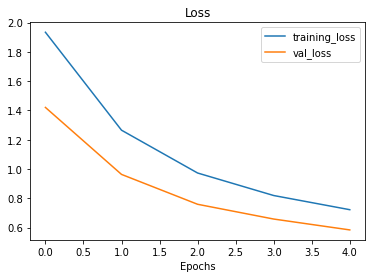

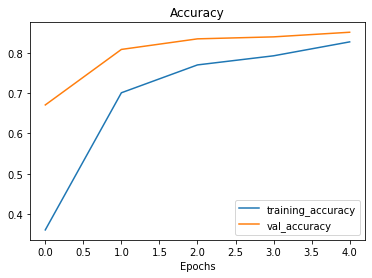

In [33]:
plot_loss_curves(history_2)

In [34]:
model_2.load_weights(checkpoint_path)
model_2.evaluate(test_data)

79/79 [==============================] - 6s 67ms/step - loss: 0.6043 - accuracy: 0.8412


[0.6042559742927551, 0.8411999940872192]

# MODEL 3 FINE TUNNIG MODEL 2

In [35]:
base_model.trainable = True
for layer in base_model.layers[:-10]:
  layer.trainable=False
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [36]:
fine_tune_epoch = initial_epochs + 5
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(0.0001),
                metrics=["accuracy"])

history_3 = model_2.fit(train_data_10,
                        epochs= fine_tune_epoch,
                        initial_epoch=history_2.epoch[-1],
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                               experiment_name="model_3_fine_tunnig"),
                       
                                   ]
                        )

Saving TensorBoard log files to: transfer_learning/model_3_fine_tunnig/20230312-090824
Epoch 5/10


24/24 [==============================] - 25s 586ms/step - loss: 0.6087 - accuracy: 0.8320 - val_loss: 0.4890 - val_accuracy: 0.8421
Epoch 6/10
24/24 [==============================] - 12s 502ms/step - loss: 0.5045 - accuracy: 0.8493 - val_loss: 0.4260 - val_accuracy: 0.8635
Epoch 7/10
24/24 [==============================] - 12s 481ms/step - loss: 0.4309 - accuracy: 0.8693 - val_loss: 0.3914 - val_accuracy: 0.8701
Epoch 8/10
24/24 [==============================] - 12s 497ms/step - loss: 0.3728 - accuracy: 0.8933 - val_loss: 0.4073 - val_accuracy: 0.8635
Epoch 9/10
24/24 [==============================] - 11s 456ms/step - loss: 0.3256 - accuracy: 0.9120 - val_loss: 0.3802 - val_accuracy: 0.8701
Epoch 10/10
24/24 [==============================] - 11s 410ms/step - loss: 0.2985 - accuracy: 0.9187 - val_loss: 0.4301 - val_accuracy: 0.8503


In [37]:
model_3_results = model_2.evaluate(test_data)
model_3_results

79/79 [==============================] - 6s 77ms/step - loss: 0.4181 - accuracy: 0.8604


[0.4180823862552643, 0.8604000210762024]

In [38]:

def compare_history(new_history, old_history, initial_epochs=5):
  # old 
  acc = old_history.history["accuracy"]
  val_acc = old_history.history["val_accuracy"]

  loss = old_history.history["loss"]
  val_loss = old_history.history["val_loss"]

  # new
  total_acc =acc + new_history.history["accuracy"]
  total_val_acc = val_acc + new_history.history["val_accuracy"]

  total_loss = loss + new_history.history["loss"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  plt.figure(figsize=(8,6))
  plt.plot(total_acc, label="Training Accuracy")
  plt.plot(total_val_acc, label= "Validation Accuracy")
  plt.plot([initial_epochs -1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")

  plt.title('Traingin and Validation Accuracy')

  plt.figure(figsize=(8,6))
  plt.plot(total_loss, label="Training Loss")
  plt.plot(total_val_loss, label= "Validation Loss")
  plt.plot([initial_epochs -1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
 
  plt.title('Loss and Validation Loss')


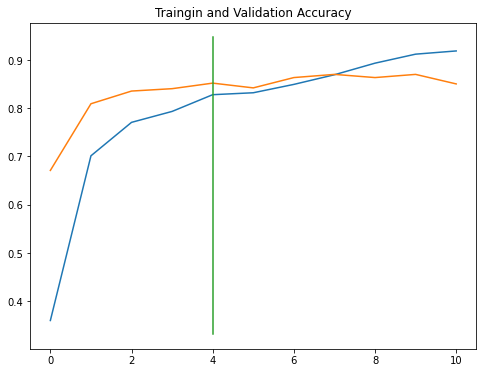

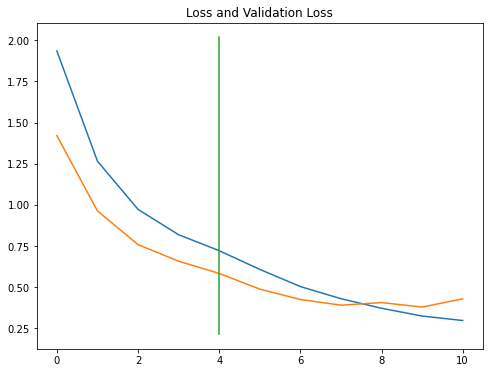

In [40]:
compare_history(old_history=history_2, new_history=history_3)

# model 4 all the data 

In [42]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

In [43]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.

In [44]:
train_dir_all = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [48]:
train_data_all = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_all,
                                                                     image_size=(224,224),
                                                                     label_mode="categorical",
                                                                     )
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=(224,224),
                                                                label_mode="categorical"
                                                                )

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [50]:
train_data_all.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [58]:
# model_2.load_weights(checkpoint_path)
model_2.evaluate(test_data)

79/79 [==============================] - 6s 70ms/step - loss: 0.6043 - accuracy: 0.8412


[0.6042559742927551, 0.8411999940872192]

In [59]:
for layer_num, layer in enumerate(base_model.layers):
  print(layer_num, layer.name,layer.trainable)

0 input_3 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [65]:
m_4_epochs=initial_epochs +5
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])
history_4 = model_2.fit(train_data_all,
                        epochs=m_4_epochs,
                        initial_epoch=history_2.epoch[-1],
                        steps_per_epoch=len(train_data_all),
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                               experiment_name="model_4")]

                        )

Saving TensorBoard log files to: transfer_learning/model_4/20230312-094349
Epoch 5/10


235/235 [==============================] - 99s 378ms/step - loss: 0.6473 - accuracy: 0.7936 - val_loss: 0.3586 - val_accuracy: 0.8734
Epoch 6/10
235/235 [==============================] - 81s 345ms/step - loss: 0.5034 - accuracy: 0.8380 - val_loss: 0.2841 - val_accuracy: 0.9046
Epoch 7/10
235/235 [==============================] - 79s 333ms/step - loss: 0.4484 - accuracy: 0.8559 - val_loss: 0.2732 - val_accuracy: 0.9079
Epoch 8/10
235/235 [==============================] - 76s 320ms/step - loss: 0.4151 - accuracy: 0.8680 - val_loss: 0.2625 - val_accuracy: 0.9194
Epoch 9/10
235/235 [==============================] - 74s 312ms/step - loss: 0.3711 - accuracy: 0.8796 - val_loss: 0.2323 - val_accuracy: 0.9293
Epoch 10/10
235/235 [==============================] - 72s 304ms/step - loss: 0.3469 - accuracy: 0.8864 - val_loss: 0.2348 - val_accuracy: 0.9211


In [66]:
model_2.evaluate(test_data)

79/79 [==============================] - 7s 79ms/step - loss: 0.2700 - accuracy: 0.9120


[0.2700290083885193, 0.9120000004768372]

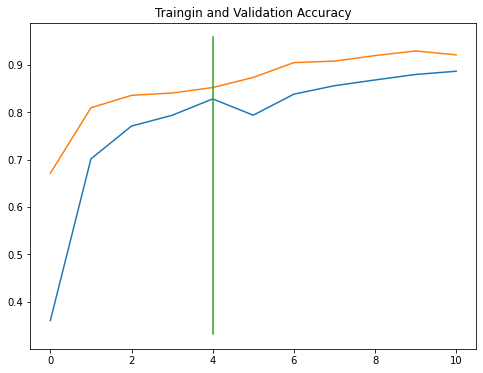

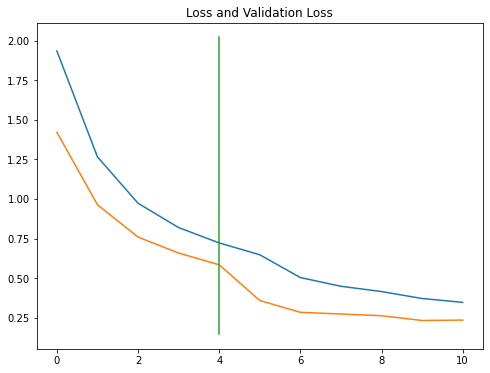

In [67]:
compare_history(old_history=history_2,
                new_history=history_4)